In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("iris.csv")

In [4]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [5]:
X=df['petal_length']
Y=df['petal_width']

X_sestosa=X[:50]
Y_sestosa=Y[:50]

X_veriscolor=X[50:100]
Y_veriscolor=Y[50:100]

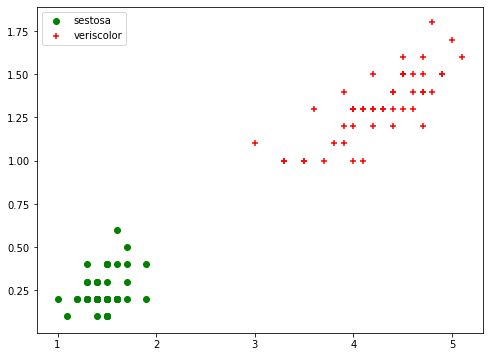

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X_sestosa,Y_sestosa,c="green",label='sestosa')
plt.scatter(X_veriscolor,Y_veriscolor,c="red",marker='+',label='veriscolor')
plt.legend()
plt.show()

In [7]:
X_1=np.concatenate((X_sestosa,X_veriscolor),axis=0)
X_2=np.concatenate((Y_sestosa,Y_veriscolor),axis=0)
X_1=np.reshape(X_1,(X_1.size,1))
X_2=np.reshape(X_2,(X_2.size,1))
X=np.concatenate((X_1,X_2),axis=1)

In [8]:
Y=np.concatenate((np.ones(50),np.ones(50)*-1),axis=0)
Y=Y.reshape((Y.size,1))

In [9]:
X=np.concatenate((np.ones((X.shape[0],1)),X),axis=1)

In [10]:
#Shapes Check
print("The shape of X is",X.shape)
print("The shape of Y is", Y.shape)

The shape of X is (100, 3)
The shape of Y is (100, 1)


In [11]:
#Splitting data into Train-Test set. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
#X_test,X_val, y_test, y_val= train_test_split(X_test,y_test,test_size=0.5)
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(60, 3) (60, 1) (40, 3) (40, 1)


In [12]:
class SVM: 
    
    def __init__(self):
        self.theta=np.ones((3,1))
        self.train_iteration_cost_lis=[]
    
    def train(self,X,Y,learning_rate, regulizer,epochs):
        
        for i in range(epochs):
            Y_train=np.dot(X,self.theta)
            #print("The shape of Y_train is", Y.shape)
            product=Y_train*Y
            #print("The shape of product is", product.shape)
            #print(np.squeeze(product))
            train_iteration_cost=0
            for p_index in range(product.size): 
                #print("Before the error",product[p_index])
                if (product[p_index][0]>1): 
                    train_iteration_cost=train_iteration_cost
                    self.theta=self.theta-learning_rate*2*regulizer*self.theta
                    
                else: 
                    train_iteration_cost=train_iteration_cost+(1-product[p_index][0])
                    grad_cost=(Y[p_index]*(X[p_index,:])).reshape(self.theta.size,1)
                    self.theta=self.theta+learning_rate*(grad_cost-2*regulizer*self.theta)
            #print("The loss for iteration"+str(i)+"is",iteration_cost)
            if (i%10):
                self.train_iteration_cost_lis.append(train_iteration_cost)
            
    def plot_loss_graph(self):
        plt.plot(self.train_iteration_cost_lis,label="TrainLoss")
        plt.ylabel('loss')
        plt.legend()
        plt.show()
        
    def optimized_theta(self):
        return self.theta 
        
    def evaluate_model(self,X_test,y_test):
        y_pred=np.dot(X_test,self.theta)
        y_pred[y_pred>=0]=1
        y_pred[y_pred<0]=-1
        print("The accuracy of the model is", (np.sum(y_pred==y_test)/y_test.size)*100)
        
        
            
            
            
    
            
            
         
            
            
            
        
    

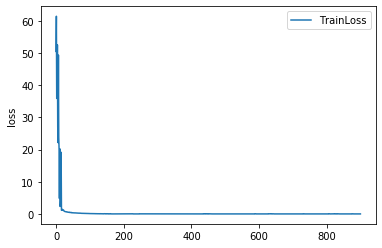

In [13]:
svm=SVM()
svm.train(X_train,y_train,0.01,0.0001,1000)
svm.plot_loss_graph()

In [14]:
svm.evaluate_model(X_test,y_test)

The accuracy of the model is 100.0


In [15]:
#Plot the large-margin classifier. 
#Train set. 
opt_theta=svm.optimized_theta()
opt_theta

array([[ 3.5386827 ],
       [-1.07758176],
       [-1.19305958]])

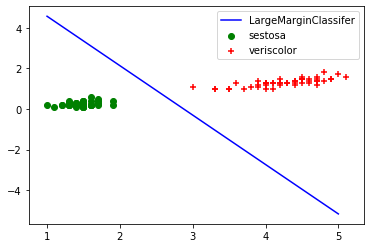

In [17]:
x = np.linspace(1,5,100)
y =7-2.433*x
plt.plot(x, y, '-r', c='blue', label='LargeMarginClassifer')
plt.scatter(X_sestosa,Y_sestosa,c="green",label='sestosa')
plt.scatter(X_veriscolor,Y_veriscolor,c="red",marker='+',label='veriscolor')
plt.legend()
plt.show()

In [131]:
1.017/0.418

2.4330143540669855